In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

from datetime import datetime
import string

In [2]:
from gensim.test.utils import get_tmpfile
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import gensim
#from sklearn.model_selection import train_test_split
import os

c:\Users\ACG\anaconda3\envs\ProjektstudiumDataMining\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
#nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("vader_lexicon")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already

True

In [4]:
# We are using kaggle's 'Harry Potter Movies Dataset', available at https://www.kaggle.com/datasets/maricinnamon/harry-potter-movies-dataset.
# The dialogues are stored in "Dialogue.csv" and using "Chapters.csv" we can see, that the first film consists of chapters 1-34.

df_dialogues = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Dialogue.csv", encoding='iso-8859-1')

# Now we can take a look at the Dataframe of film one:
# It consists of the Chapter ID, the Place ID, Character ID and is split into the dialogues.
df_dialogues

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  
0     I should have known that you would be here...P...  
1     Good evening, Professor Dumbledore. Are the ru...  
2      I'm afraid so, Professor. The good, and the bad.  
3                                          And the boy?  
4                               Hagrid is bringing him.  
...                                                 ...  
7439  Then Slytherin House will have gained a wonder...  
7440                                            Really?  
7441                                            Really.  
7442                                             Ready?  
7443                                             Ready.  

[7444 rows x 5 columns]

In [5]:
#Gensim Preprocessing
def preprocess(row):
    return gensim.utils.simple_preprocess(row['Dialogue'])

df_dialogues['Tokens_Gensim'] = df_dialogues.apply(preprocess, axis=1)
df_dialogues

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  
0     [should, have, known, that, you, would, be, he...  
1     [good, evening, professor, dumbledore, are, th...  
2     [afraid, so, professor, the, good, and, the, bad]  
3                                       [and, the, boy]  
4                           [hagrid, is, bringing, him]  
...                                                 ...  
7439  [then, slytherin, house, will, have, gained, w...  
7440                                           [really]  
7441                                           [really]  
7442                                            [ready]  
7443                                            [ready]  

[7444 rows x 6 columns]

In [6]:
#Punctuation, Tokenization (NLTK), Stopwords (radikaler als Gensim)
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation," ")
    return text

df_dialogues['Tokens'] = df_dialogues['Dialogue'].str.lower().apply(remove_punctuations).apply(nltk.word_tokenize)
df_dialogues['Tokens']
df_dialogues

dialoge = df_dialogues['Tokens'].tolist()
filtered_tokens = []
for line in dialoge:
    line_list = []
    for token in line:
        if token.lower() not in stopwords.words('english') and token not in string.punctuation:
            line_list.append(token)

    filtered_tokens.append(line_list)

df_dialogues['Tokens'] = filtered_tokens
df_dialogues

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  \
0     [should, have, known, that, you, would, be, he...   
1     [good, evening, professor, dumbledore, are, th...   
2     [afraid, so, professor, the, good, and, the, bad]   
3                                       [and, the, boy]   
4                           [hagrid, is, bringing, him]   
...                                                 ...   
7439  [then, slytherin, house, will, have, gained, w...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                                 Tokens  
0                 [known, would, professor, mcgonagall]  
1     [good, evening, professor, dumbledore, rumours...  
2                        [afraid, professor, good, bad]  
3                                                 [boy]  
4                                    [hagrid, bringing]  
...                                                 ...  
7439  [slytherin, house, gained, wonderful, wizard, ...  
7440                                           [really]  
7441                                           [really]  
7442                                            [ready]  
7443                                            [ready]  

[7444 rows x 7 columns]

In [7]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem import SnowballStemmer
porter = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

dialoge = df_dialogues['Tokens']

# Lemmitization
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer() 

# Stemming und Lemmitization gegenüberstellen
for line in dialoge:
    for word in line:
        print( [word , porter.stem(word), lancaster.stem(word),snowball.stem(word), wnl.lemmatize(word)])

['known', 'known', 'known', 'known', 'known']
['would', 'would', 'would', 'would', 'would']
['professor', 'professor', 'profess', 'professor', 'professor']
['mcgonagall', 'mcgonagal', 'mcgonagall', 'mcgonagal', 'mcgonagall']
['good', 'good', 'good', 'good', 'good']
['evening', 'even', 'ev', 'even', 'evening']
['professor', 'professor', 'profess', 'professor', 'professor']
['dumbledore', 'dumbledor', 'dumbl', 'dumbledor', 'dumbledore']
['rumours', 'rumour', 'rumo', 'rumour', 'rumour']
['true', 'true', 'tru', 'true', 'true']
['albus', 'albu', 'alb', 'albus', 'albus']
['afraid', 'afraid', 'afraid', 'afraid', 'afraid']
['professor', 'professor', 'profess', 'professor', 'professor']
['good', 'good', 'good', 'good', 'good']
['bad', 'bad', 'bad', 'bad', 'bad']
['boy', 'boy', 'boy', 'boy', 'boy']
['hagrid', 'hagrid', 'hagrid', 'hagrid', 'hagrid']
['bringing', 'bring', 'bring', 'bring', 'bringing']
['think', 'think', 'think', 'think', 'think']
['wise', 'wise', 'wis', 'wise', 'wise']
['trust', '

In [8]:
# Part of Speech tagging (POS)

def pos_tag_text(row):
    # import tokens
    tokens = row['Tokens']

    # Perform POS tagging
    pos_tags = nltk.pos_tag(tokens)
    
    return pos_tags

# Apply the pos_tag_text() function to the dialogue column
df_dialogues['pos_tags'] = df_dialogues.apply(pos_tag_text, axis=1)
df_dialogues

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  \
0     [should, have, known, that, you, would, be, he...   
1     [good, evening, professor, dumbledore, are, th...   
2     [afraid, so, professor, the, good, and, the, bad]   
3                                       [and, the, boy]   
4                           [hagrid, is, bringing, him]   
...                                                 ...   
7439  [then, slytherin, house, will, have, gained, w...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                                 Tokens  \
0                 [known, would, professor, mcgonagall]   
1     [good, evening, professor, dumbledore, rumours...   
2                        [afraid, professor, good, bad]   
3                                                 [boy]   
4                                    [hagrid, bringing]   
...                                                 ...   
7439  [slytherin, house, gained, wonderful, wizard, ...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                               pos_tags  
0     [(known, VBN), (would, MD), (professor, VB), (...  
1     [(good, JJ), (evening, NN), (professor, NN), (...  
2     [(afraid, NN), (professor, NN), (good, JJ), (b...  
3                                           [(boy, NN)]  
4                        [(hagrid, JJ), (bringing, NN)]  
...                                                 ...  
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...  
7440                                     [(really, RB)]  
7441                                     [(really, RB)]  
7442                                      [(ready, JJ)]  
7443                                      [(ready, JJ)]  

[7444 rows x 8 columns]

In [9]:
# Chunking

def get_chunks(row):
    # Get the pos_tags
    pos_tags = row['pos_tags']

    # Get chunks
    chunked = nltk.ne_chunk(pos_tags)

    return chunked
    
df_dialogues['chunks'] = df_dialogues.apply(get_chunks, axis=1)
df_dialogues['chunks']

0       [(known, VBN), (would, MD), (professor, VB), (...
1       [(good, JJ), (evening, NN), (professor, NN), (...
2       [(afraid, NN), (professor, NN), (good, JJ), (b...
3                                             [(boy, NN)]
4                          [(hagrid, JJ), (bringing, NN)]
                              ...                        
7439    [(slytherin, NN), (house, NN), (gained, VBD), ...
7440                                       [(really, RB)]
7441                                       [(really, RB)]
7442                                        [(ready, JJ)]
7443                                        [(ready, JJ)]
Name: chunks, Length: 7444, dtype: object

In [10]:
# Load the English model
# spacy model must be installed first with 'python -m spacy download en_core_web_sm' in the terminal
import spacy

nlp = spacy.load('en_core_web_sm')
def extract_entities(row):
    # Process the text
    doc = nlp(row['Dialogue'])
    
    # Extract named entities
    entities = ([(X.text, X.label_) for X in doc.ents])
    
    return entities


df_dialogues['all_entities_spacy_dial'] = df_dialogues.apply(extract_entities, axis=1)
df_dialogues

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  \
0     [should, have, known, that, you, would, be, he...   
1     [good, evening, professor, dumbledore, are, th...   
2     [afraid, so, professor, the, good, and, the, bad]   
3                                       [and, the, boy]   
4                           [hagrid, is, bringing, him]   
...                                                 ...   
7439  [then, slytherin, house, will, have, gained, w...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                                 Tokens  \
0                 [known, would, professor, mcgonagall]   
1     [good, evening, professor, dumbledore, rumours...   
2                        [afraid, professor, good, bad]   
3                                                 [boy]   
4                                    [hagrid, bringing]   
...                                                 ...   
7439  [slytherin, house, gained, wonderful, wizard, ...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                               pos_tags  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440                                     [(really, RB)]   
7441                                     [(really, RB)]   
7442                                      [(ready, JJ)]   
7443                                      [(ready, JJ)]   

                                                 chunks  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440         

In [11]:
df_characters = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Characters.csv", encoding='ISO-8859-1')
df_chardialogues = pd.merge(df_dialogues, df_characters, on='Character ID', how="left")
df_chardialogues
df_dialHarry = df_chardialogues[df_chardialogues['Character ID'] == 1]
df_dialRon = df_chardialogues[df_chardialogues['Character ID'] == 2]
df_dialHerm = df_chardialogues[df_chardialogues['Character ID'] == 3]
df_dialDumbl = df_chardialogues[df_chardialogues['Character ID'] == 4]
df_dialHagr = df_chardialogues[df_chardialogues['Character ID'] == 5]
df_dialSnape = df_chardialogues[df_chardialogues['Character ID'] == 6]
df_dialVold = df_chardialogues[df_chardialogues['Character ID'] == 9]
df_characters_list = [df_dialHarry,df_dialRon,df_dialHerm,df_dialDumbl,df_dialHagr,df_dialSnape,df_dialVold] #--> warum brauchen wir das?

In [12]:
df_movie = pd.read_csv('C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Chapters.csv', encoding='ISO-8859-1')
df_movie
df_movies = pd.merge(df_chardialogues, df_movie, on='Chapter ID', how="left")
df_film1 = df_movies[df_movies['Movie ID'] == 1]
df_film2 = df_movies[df_movies['Movie ID'] == 2]
df_film3 = df_movies[df_movies['Movie ID'] == 3]
df_film4 = df_movies[df_movies['Movie ID'] == 4]
df_film5 = df_movies[df_movies['Movie ID'] == 5]
df_film6 = df_movies[df_movies['Movie ID'] == 6]
df_film7 = df_movies[df_movies['Movie ID'] == 7]
df_film8 = df_movies[df_movies['Movie ID'] == 8]
film_dial_list = [df_film1, df_film2, df_film3,  df_film4, df_film5, df_film6, df_film7, df_film8] #wofür brauchen wir das?


<AxesSubplot: >

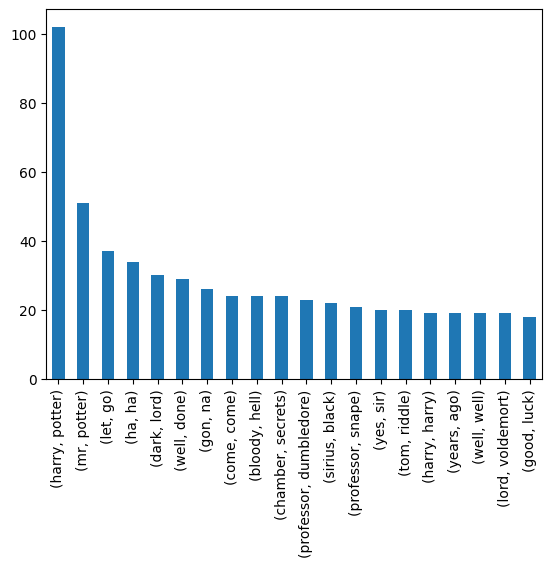

In [13]:
#ngrams über alle Filme / bigrams
from nltk.util import ngrams
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
df_dialogues

dialoge = df_movies['Tokens']
dialoge.tolist()
biGram = []
for line in dialoge:
    biGram.append(ngrams(line, 2))
biGram

fdist = FreqDist()
for line in biGram:
    for word in line:
        fdist[word] +=1 
nGram_freq = fdist
all_fdist = FreqDist(nGram_freq).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
all_fdist.plot(kind='bar')

<AxesSubplot: >

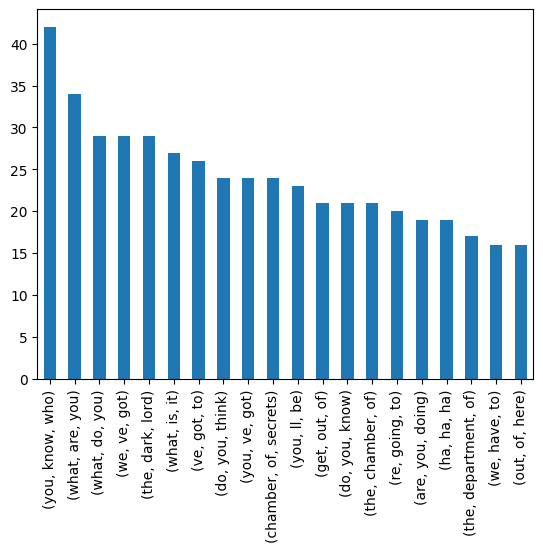

In [14]:
#trigrams
dialoge = df_movies['Tokens_Gensim']
dialoge.tolist()
triGram = []
for line in dialoge:
    triGram.append(ngrams(line, 3))
triGram

fdist = FreqDist()
for line in triGram:
    for word in line:
        fdist[word] +=1 
triGram_freq = fdist
all_fdist = FreqDist(triGram_freq).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
all_fdist.plot(kind='bar')

<AxesSubplot: >

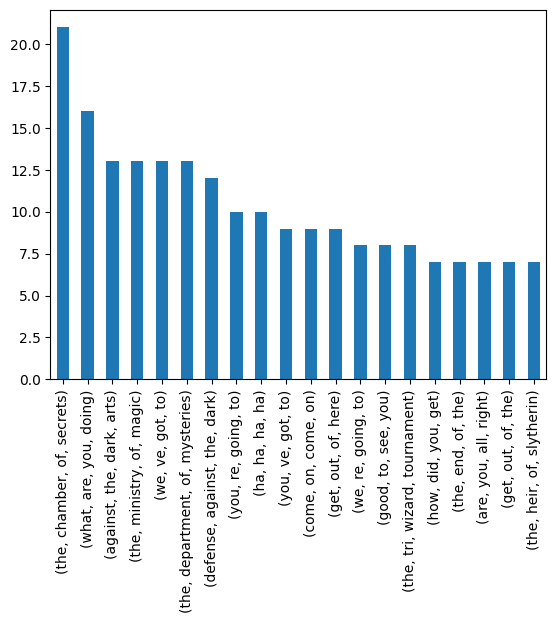

In [15]:
#quadgrams
df_movies

dialoge = df_movies['Tokens_Gensim']
dialoge.tolist()
quadGram = []
for line in dialoge:
    quadGram.append(ngrams(line, 4))
quadGram

fdist = FreqDist()
for line in quadGram:
    for word in line:
        fdist[word] +=1 
quadGram_freq = fdist
all_fdist = FreqDist(quadGram_freq).most_common(20)
all_fdist = pd.Series(dict(all_fdist))
all_fdist.plot(kind='bar')

C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\2142260107.py:78: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8,1,i)


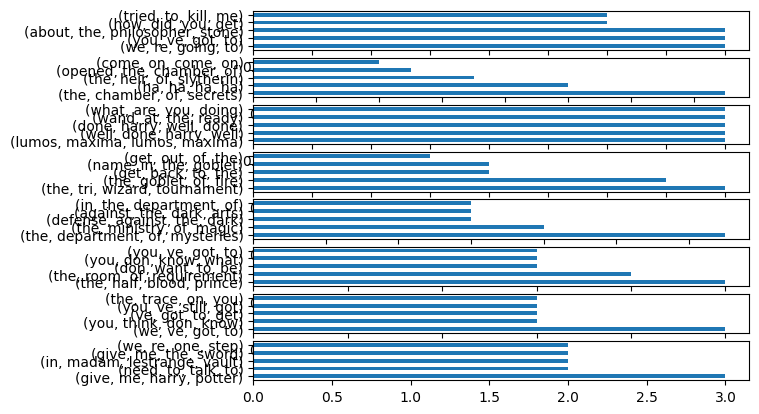

In [16]:
#hinzugefügt: nur movie 1
import seaborn as sns

df_movies
dialoge = df_movies[df_movies['Movie ID'] ==1]
dialoge = dialoge['Tokens_Gensim']
dialoge
# dialoge = df_dialogues["Tokens_Gensim"]
dialoge.tolist()
quadGram = []
for line in dialoge:
    quadGram.append(ngrams(line, 4))
quadGram

fdist = FreqDist()
for line in quadGram:
    for word in line:
        fdist[word] +=1 
quadGram_freq = fdist
all_fdist = FreqDist(quadGram_freq).most_common(5)
all_fdist = pd.Series(dict(all_fdist))
plt.subplot(2,1,1)
all_fdist.plot(kind='barh')

# all_fdist = pd.DataFrame(all_fdist)
# all_fdist = all_fdist.reset_index()
# all_fdist = all_fdist.rename(columns={"level_0": "ngrams", "level_1" : "", "level_2": "", "level_3": "", 0 : "count"})
# all_fdist = all_fdist
# all_fdist
# sns.set_style("whitegrid")
# plt.figure(figsize= (10,7))
# sns.barplot(x = "wordcount", y ="wordse", data = all_fdist, order = all_fdist.sort_values("wordcount",ascending = False), orient = "h")
# plt.xlabel("Number of word of dialogue", fontsize = 15)
# plt.ylabel("Character", fontsize = 15)
# plt.title("Character Importance by Number of words", fontsize = 20)
# plt.show()

# dialoge2 = df_movies[df_movies["Movie ID"] ==2]
# dialoge2= dialoge2["Tokens_Gensim"]
# dialoge2

# dialoge2.tolist()
# quadGram2 = []
# for line in dialoge2:
#     quadGram2.append(ngrams(line, 4))
# quadGram2

# fdist = FreqDist()
# for line in quadGram2:
#     for word in line:
#         fdist[word] +=1 
# quadGram_freq2 = fdist
# all_fdist2 = FreqDist(quadGram_freq2).most_common(5)
# all_fdist2 = pd.Series(dict(all_fdist2))
# plt.subplot(2,1,2)
# all_fdist2.plot(kind='barh')

# plt.show()


for i in range(1,9):
    dialoge = df_movies[df_movies['Movie ID'] == i]
    dialoge= dialoge['Tokens_Gensim']
    dialoge
    dialoge.tolist()
    quadGram = []
    for line in dialoge:
        quadGram.append(ngrams(line, 4))
    quadGram

    fdist = FreqDist()
    for line in quadGram:
        for word in line:
            fdist[word] +=1 
    quadGram_freq = fdist
    all_fdist = FreqDist(quadGram_freq).most_common(5)
    all_fdist = pd.Series(dict(all_fdist))
    plt.subplot(8,1,i)
    all_fdist.plot(kind='barh')

plt.show()



In [17]:
#wie oft kommt ein Wort vor?
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

# #mit allen Wörtern
# dialoge = df_movies["Tokens"]
# dialoge

# fdist = FreqDist()
# for line in dialoge:
#     for word in line:
#         fdist[word] +=1        
# Token_freq = fdist
# Token_freq.most_common(5)

#für alle Filme 
dialoge = df_movies['Tokens']
dialoge

fdist = FreqDist()
for line in dialoge:
    for word in line:
        fdist[word] +=1        
ohnestopwords_freq = fdist
freq = ohnestopwords_freq.most_common(5)


#fdist.plot(5, title = "most frequent top 5 Words")

#print([Token_freq.most_common(5), ohnestopwords_freq.most_common(5)])
print(ohnestopwords_freq.most_common(5))

#für Harry
df_dialHarry
fdistH = FreqDist()
for line in df_dialHarry['Tokens']:
    for word in line:
         fdistH[word] +=1        
commonwords_freq = fdistH
print(commonwords_freq)
freqH = commonwords_freq.most_common(50)
freqH

[('harry', 712), ('know', 429), ('well', 374), ('one', 344), ('potter', 309)]
<FreqDist with 1692 samples and 6433 outcomes>


[('sir', 121),
 ('know', 111),
 ('think', 79),
 ('hermione', 78),
 ('one', 70),
 ('ron', 70),
 ('get', 60),
 ('well', 59),
 ('go', 59),
 ('hagrid', 59),
 ('professor', 57),
 ('got', 56),
 ('come', 52),
 ('right', 49),
 ('yeah', 46),
 ('like', 45),
 ('dumbledore', 45),
 ('see', 43),
 ('something', 42),
 ('yes', 41),
 ('back', 41),
 ('tell', 40),
 ('going', 40),
 ('could', 38),
 ('voldemort', 38),
 ('mean', 37),
 ('let', 36),
 ('need', 34),
 ('sirius', 32),
 ('us', 31),
 ('really', 31),
 ('kill', 29),
 ('sorry', 28),
 ('dobby', 28),
 ('oh', 27),
 ('take', 26),
 ('look', 26),
 ('would', 26),
 ('okay', 25),
 ('never', 24),
 ('find', 24),
 ('help', 21),
 ('snape', 20),
 ('said', 20),
 ('want', 20),
 ('happened', 19),
 ('good', 19),
 ('time', 19),
 ('luna', 19),
 ('mr', 18)]

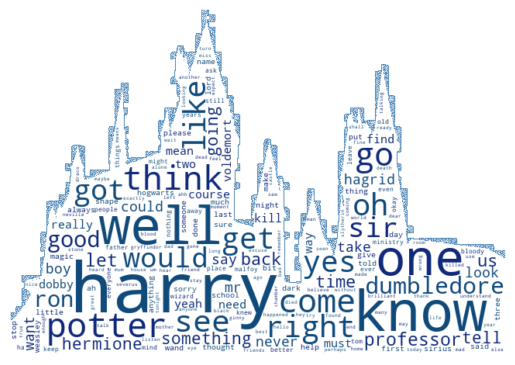

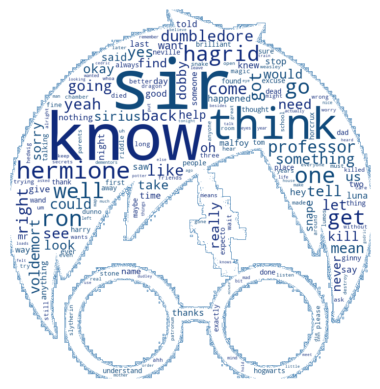

In [18]:
##Darstellung als Wordcloud
#Wordcloud für alle
import numpy as np
from wordcloud import WordCloud
from PIL import Image
import matplotlib
#x,y = np.ogrid[:1000,:1000]
# mask = (x-500)**2 +(y-500)**2> 400**2
# mask = 255*mask.astype(int)
#Maske bauen
photo3 = Image.open("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/ProjektProgramm/AnalyseAnja/hogwarts.jpg")
mask = np.array(photo3)
plt.imshow(photo3)

#Farben anpassen
colorslist = ['#102A7B', '#104A7B']  #hattps:\\htmlcolorcodes.com
ColorMap = matplotlib.colors.ListedColormap(colorslist)

#WordCloud bilden
# min_font_size?
word_cloud = WordCloud(mask = mask, background_color= 'white',contour_width = 0.01,contour_color = 'steelblue', colormap = ColorMap, width = 800, height = 400).generate_from_frequencies(ohnestopwords_freq)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#Wordclound für Harry
photo2 = Image.open("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/ProjektProgramm/AnalyseAnja/harry-potter-silhouettes-4.jpg")
maskharry = np.array(photo2)
plt.imshow(photo2)

word_cloud = WordCloud(mask = maskharry, background_color='white',colormap = ColorMap, contour_width = 0.01,contour_color = 'steelblue', width = 1000, height = 1000).generate_from_frequencies(commonwords_freq)
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

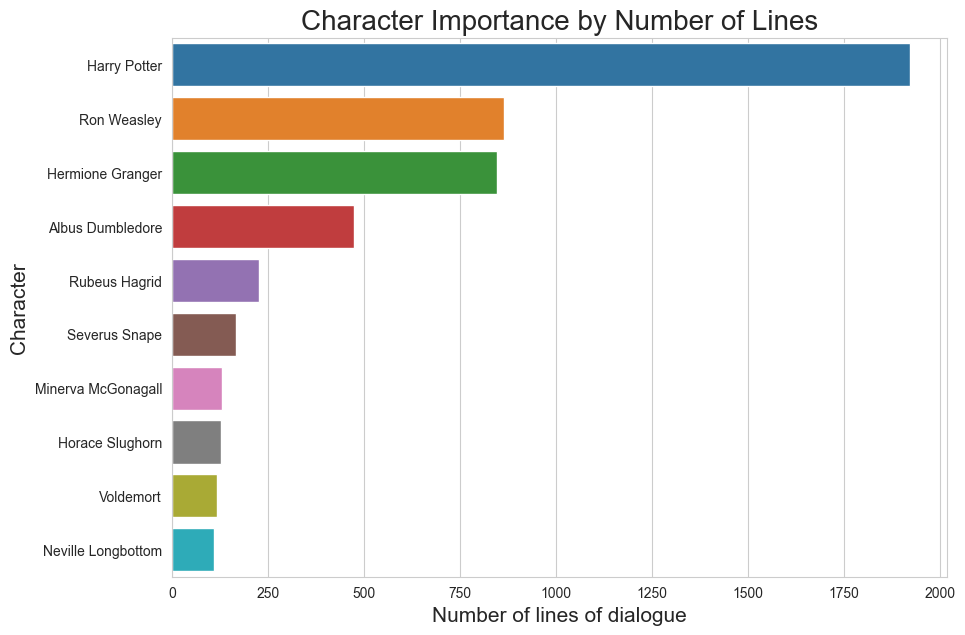

C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\843955576.py:45: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x = 'wordcount', y ='CharacterName', data = totalword, order = totalword.sort_values('wordcount',ascending = False).CharacterName[0:10], orient = "h")


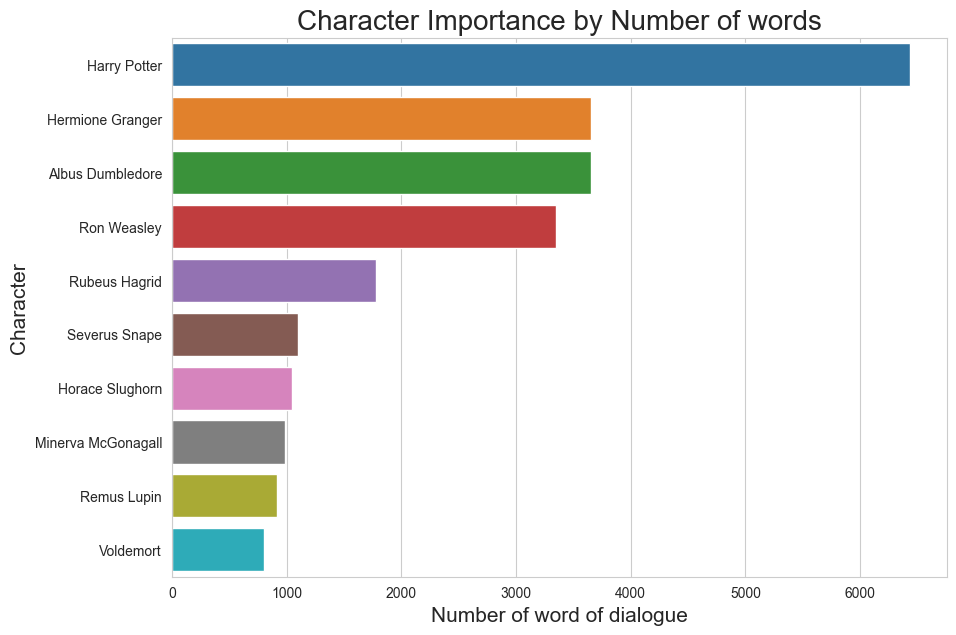

In [19]:
#Redeanteile der Charaktere pro Satz
import numpy 
import seaborn as sns
from collections import Counter
import re

charaktere = df_movies['Character Name'].value_counts()
charaktere

#Grafik
sns.set_style('whitegrid')
plt.figure(figsize= (10,7))
sns.countplot(y =df_chardialogues['Character Name'], data = df_chardialogues, order = df_chardialogues['Character Name'].value_counts().iloc[:10].index)
plt.xlabel('Number of lines of dialogue', fontsize = 15)
plt.ylabel('Character', fontsize = 15)
plt.title('Character Importance by Number of Lines', fontsize = 20)
plt.show()

# sns.set_style("whitegrid")
# plt.figure(figsize= (10,7))
# sns.countplot(y ="Character Name", data = df_chardialogues, order = df_chardialogues["Character Name"].value_counts().iloc[:10].index)
# plt.xlabel("Number of lines of dialogue", fontsize = 15)
# plt.ylabel("Character", fontsize = 15)
# plt.title("Character Importance by Number of Lines", fontsize = 20)
# plt.show()



#Redeanteil der Charaktere pro Wort
dialoge = df_movies['Tokens']
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df_movies['wordcount'] = wordcount
df_movies

totalword = df_movies.groupby('Character Name', as_index= False).wordcount.sum()
totalword = totalword.rename(columns ={ totalword.columns[0]: 'CharacterName'})
totalword

#Grafik
sns.set_style('whitegrid')
plt.figure(figsize= (10,7))
sns.barplot(x = 'wordcount', y ='CharacterName', data = totalword, order = totalword.sort_values('wordcount',ascending = False).CharacterName[0:10], orient = "h")
plt.xlabel('Number of word of dialogue', fontsize = 15)
plt.ylabel('Character', fontsize = 15)
plt.title('Character Importance by Number of words', fontsize = 20)
plt.show()

In [20]:
#3. Tokenize Methode
dialogues = df_movies['Dialogue'].tolist()
dialogues_tokens = [nltk.word_tokenize(line) for line in dialogues]

# Then we remove stopwords. This works by creating a loop that iterates over each token in a line of dialogue (token for token in line).
# If the lowercase version of that token is not in a list of stopwords (if token.lower() not in stop_words and token not in string.punctuation) 
# we output it into the filtered_tokens list.
# We use the stopwords from NLTK and Python's built-in string method.
stop_words = stopwords.words('english')
filtered_tokens = [[token for token in line if token.lower() not in stop_words and token not in string.punctuation] for line in dialogues_tokens]

# Now we assign the filtered_tokens list back to the dataframe.
df_dialogues = df_dialogues.assign(tokens=filtered_tokens)
df_dialogues


Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  \
0     [should, have, known, that, you, would, be, he...   
1     [good, evening, professor, dumbledore, are, th...   
2     [afraid, so, professor, the, good, and, the, bad]   
3                                       [and, the, boy]   
4                           [hagrid, is, bringing, him]   
...                                                 ...   
7439  [then, slytherin, house, will, have, gained, w...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                                 Tokens  \
0                 [known, would, professor, mcgonagall]   
1     [good, evening, professor, dumbledore, rumours...   
2                        [afraid, professor, good, bad]   
3                                                 [boy]   
4                                    [hagrid, bringing]   
...                                                 ...   
7439  [slytherin, house, gained, wonderful, wizard, ...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                               pos_tags  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440                                     [(really, RB)]   
7441                                     [(really, RB)]   
7442                                      [(ready, JJ)]   
7443                                      [(ready, JJ)]   

                                                 chunks  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440         

In [21]:
# Spells

df_spells = pd.read_csv("C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Spells.csv")
spells = df_spells['Incantation'].str.lower().to_list()
spells

# Check whether a row (i.e., a dialogue) contains a spell, and returns the spell as item of a list in the row. Function had to be modified to recognize BOTH one- and two-word spells.
def count_spells_1and2words(row, spells):
    used_spells = []
    for spell in spells:
        if ' ' in spell:
            # Check if the two-word spell appears as a whole
            if spell in ' '.join(row):
                used_spells.append(spell)
        else:
            # Check if the one-word spell appears as a whole or as part of a larger word
            if spell in row:
                used_spells.append(spell)
    return used_spells

# Use count_spells_1and2words and apply it into the column 'spell_count' for each row.
df_movies['spell_count'] = df_movies['Tokens'].apply(count_spells_1and2words, spells=spells)

# make spell_counts a dataframe that consists of the spell as index and the value_count as df entry
spell_counts = df_movies['spell_count'].value_counts()
print(spell_counts.head(10))

[]                    7312
[expelliarmus]          12
[expecto patronum]      12
[lumos]                  9
[riddikulus]             8
[accio]                  6
[alohomora]              5
[stupefy]                4
[impedimenta]            4
[confringo]              4
Name: spell_count, dtype: int64


In [22]:
df_movies

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  \
0     [should, have, known, that, you, would, be, he...   
1     [good, evening, professor, dumbledore, are, th...   
2     [afraid, so, professor, the, good, and, the, bad]   
3                                       [and, the, boy]   
4                           [hagrid, is, bringing, him]   
...                                                 ...   
7439  [then, slytherin, house, will, have, gained, w...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                                 Tokens  \
0                 [known, would, professor, mcgonagall]   
1     [good, evening, professor, dumbledore, rumours...   
2                        [afraid, professor, good, bad]   
3                                                 [boy]   
4                                    [hagrid, bringing]   
...                                                 ...   
7439  [slytherin, house, gained, wonderful, wizard, ...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                               pos_tags  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440                                     [(really, RB)]   
7441                                     [(really, RB)]   
7442                                      [(ready, JJ)]   
7443                                      [(ready, JJ)]   

                                                 chunks  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440         

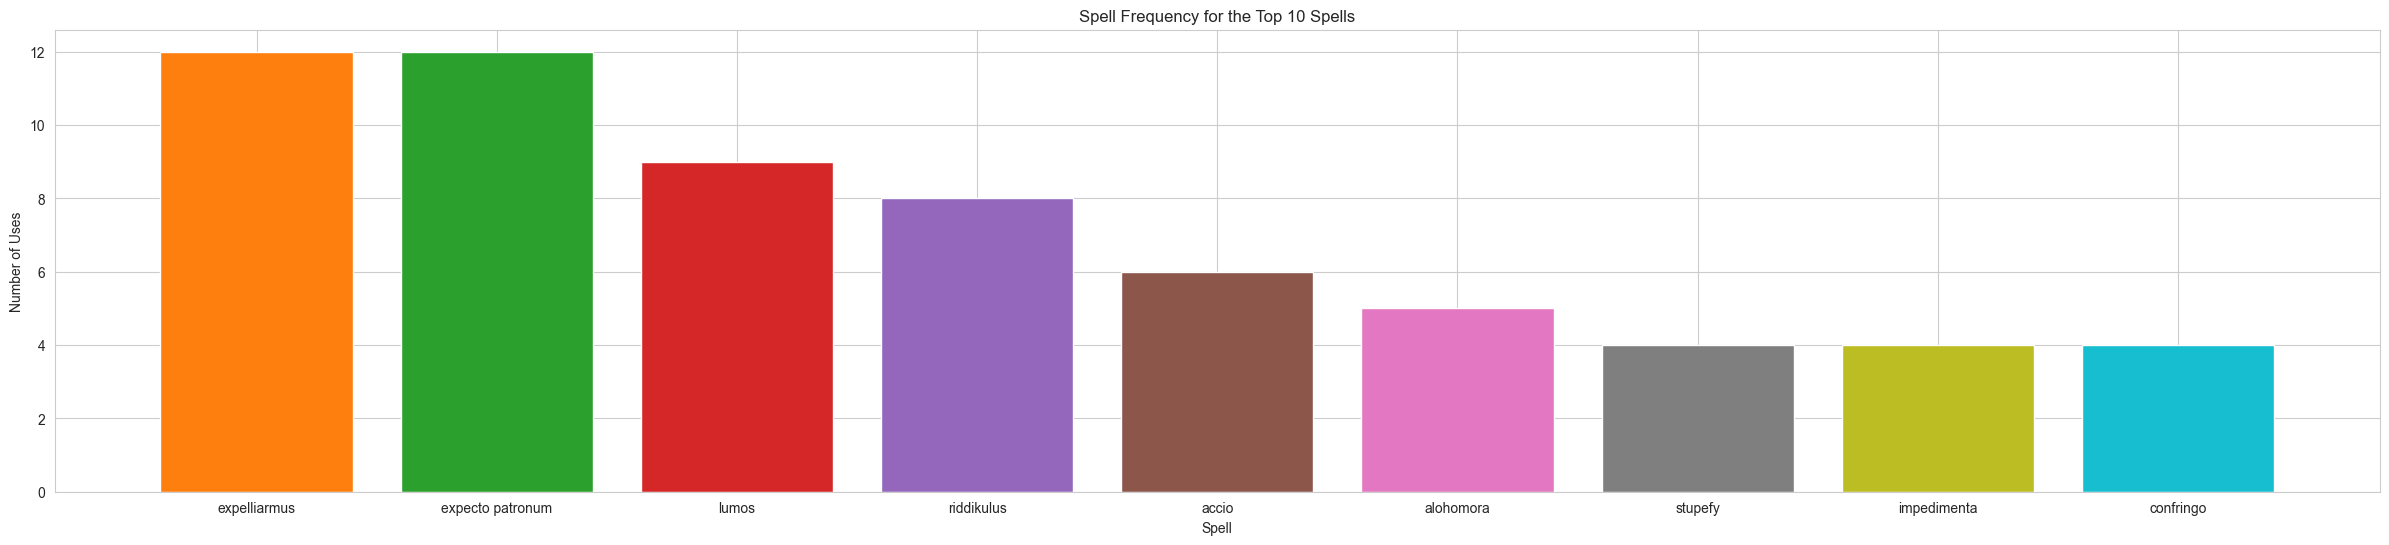

In [23]:
#Top 10 Spells in allen Filmen
counts = df_movies['spell_count'].value_counts()
most_used_spells = counts[:10]
plt.figure(figsize=(30, 6))

for character_id, count in most_used_spells.items():
    plt.bar(character_id, count)

plt.xlabel('Spell')
plt.ylabel('Number of Uses')
plt.title('Spell Frequency for the Top 10 Spells')
plt.show()

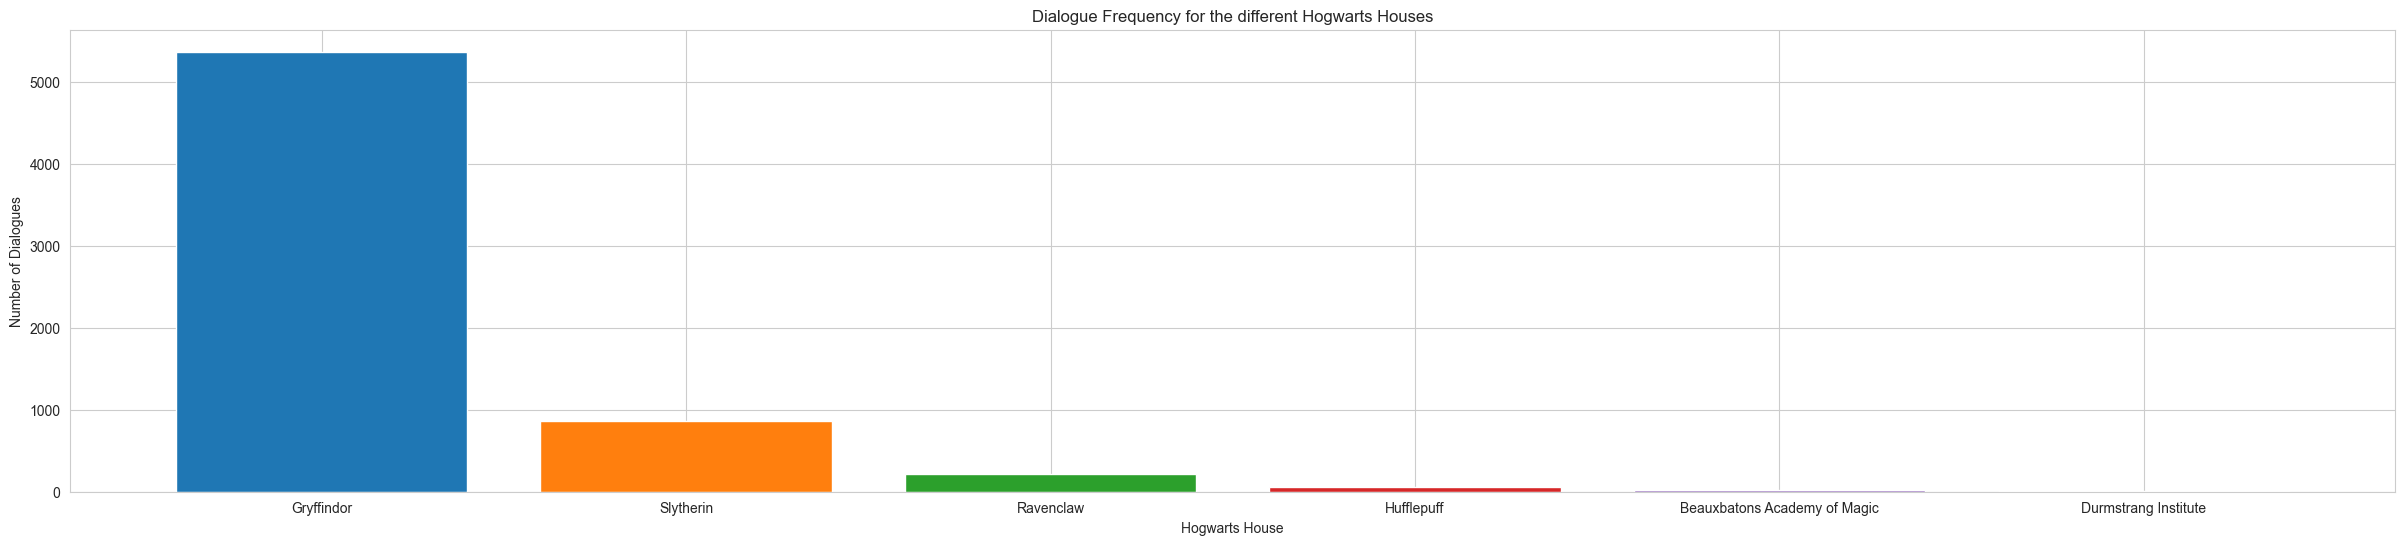

In [24]:
# Count and barplot of dialogue per house for all movies

counts = df_movies['House'].value_counts()
top_talkative_houses = counts[:10]

plt.figure(figsize=(30, 6))

for character_id, count in top_talkative_houses.items():
    plt.bar(character_id, count)

plt.xlabel('Hogwarts House')
plt.ylabel('Number of Dialogues')
plt.title('Dialogue Frequency for the different Hogwarts Houses')
plt.show()

In [25]:
# #hinzugefügt für jeden Film extra:
# for i in range(1,9):
#     dialoge = df_movies[df_movies["Movie ID"] == i]
#     counts = dialoge['House'].value_counts()
#     top_talkative_houses = counts[:10]

#     plt.figure(figsize=(30, 6))

#     for character_id, count in top_talkative_houses.items():
#         plt.subplot(1,i,i)
#         plt.bar(character_id, count)
#     plt.xlabel("Hogwarts House")
#     plt.ylabel("Number of Dialogues")
#     plt.title("Dialogue Frequency for the different Hogwarts Houses")
# plt.show()

In [26]:
#Filme anschauen
Movie = pd.read_csv('C:/Users/ACG/Documents/Uni/BWL/5.Semester/Projektstudium/Datensatz/archive/Harry_Potter_Movies/Movies.csv', encoding='ISO-8859-1')
Movie = Movie.rename(columns ={ Movie.columns[0]: "Movie ID"})
Movie

#Filmgrenzen
Filmgrenzen = []
for i in Movie["Movie ID"]:
    movie = df_movies[df_movies["Movie ID"] == i]
    Filmgrenzen.append(max(movie["Chapter ID"]))
Filmgrenzen

#wie viele Kapitel besitzt ein Film?
AnzahlKapitel = []
for i in Movie["Movie ID"]:
    movie = df_movies[df_movies["Movie ID"] == i]
    AnzahlKapitel.append(max(movie["Chapter ID"])-min(movie["Chapter ID"])+1)
AnzahlKapitel

#Anzahl Sätze pro Kapitel
AnzahlSätzeproKapitel = []
AnzahlSätzeproKapitel = df_movies["Movie ID"].value_counts()
AnzahlSätzeproKapitel = pd.DataFrame(AnzahlSätzeproKapitel).reset_index().rename(columns={"index": "Movie ID", "Movie ID": "Anzahl Dialoge"}).sort_values(by = ["Movie ID"], ascending =True).reset_index()
AnzahlSätzeproKapitel["Kapitelanzahl"] = (AnzahlKapitel)
AnzahlSätzeproKapitel= AnzahlSätzeproKapitel.drop("index", axis = 1)
AnzahlSätzeproKapitel = AnzahlSätzeproKapitel.loc[:,["Movie ID", "Kapitelanzahl", "Anzahl Dialoge"]]
AnzahlSätzeproKapitel


Movie ID  Kapitelanzahl  Anzahl Dialoge
0         1             34             885
1         2             36             986
2         3             33             881
3         4             27             741
4         5             27            1157
5         6             26            1070
6         7             25            1012
7         8             26             712

In [27]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
nltk.download('vader_lexicon')
sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()
sediment.lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ACG\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'$:': -1.5,
 '%)': -0.4,
 '%-)': -1.5,
 '&-:': -0.4,
 '&:': -0.7,
 "( '}{' )": 1.6,
 '(%': -0.9,
 "('-:": 2.2,
 "(':": 2.3,
 '((-:': 2.1,
 '(*': 1.1,
 '(-%': -0.7,
 '(-*': 1.3,
 '(-:': 1.6,
 '(-:0': 2.8,
 '(-:<': -0.4,
 '(-:o': 1.5,
 '(-:O': 1.5,
 '(-:{': -0.1,
 '(-:|>*': 1.9,
 '(-;': 1.3,
 '(-;|': 2.1,
 '(8': 2.6,
 '(:': 2.2,
 '(:0': 2.4,
 '(:<': -0.2,
 '(:o': 2.5,
 '(:O': 2.5,
 '(;': 1.1,
 '(;<': 0.3,
 '(=': 2.2,
 '(?:': 2.1,
 '(^:': 1.5,
 '(^;': 1.5,
 '(^;0': 2.0,
 '(^;o': 1.9,
 '(o:': 1.6,
 ")':": -2.0,
 ")-':": -2.1,
 ')-:': -2.1,
 ')-:<': -2.2,
 ')-:{': -2.1,
 '):': -1.8,
 '):<': -1.9,
 '):{': -2.3,
 ');<': -2.6,
 '*)': 0.6,
 '*-)': 0.3,
 '*-:': 2.1,
 '*-;': 2.4,
 '*:': 1.9,
 '*<|:-)': 1.6,
 '*\\0/*': 2.3,
 '*^:': 1.6,
 ',-:': 1.2,
 "---'-;-{@": 2.3,
 '--<--<@': 2.2,
 '.-:': -1.2,
 '..###-:': -1.7,
 '..###:': -1.9,
 '/-:': -1.3,
 '/:': -1.3,
 '/:<': -1.4,
 '/=': -0.9,
 '/^:': -1.0,
 '/o:': -1.4,
 '0-8': 0.1,
 '0-|': -1.2,
 '0:)': 1.9,
 '0:-)': 1.4,
 '0:-3': 1.5,
 '0:03': 1.9,
 '

In [28]:
#SentimentAnalyse über ganzen DataFrame
scores = df_movies.Dialogue.apply(lambda x: sediment.polarity_scores(x))
scores
df_movies['SentimentScore'] = scores
df_movies['CompScore'] = df_movies.SentimentScore.apply(lambda x: x.get('compound'))
df_movies['PosScore'] = df_movies.SentimentScore.apply(lambda x: x.get('pos'))
df_movies['NegScore'] = df_movies.SentimentScore.apply(lambda x: x.get('neg'))
df_movies['NeuScore'] = df_movies.SentimentScore.apply(lambda x: x.get('neu'))
df_movies

df_movies

Dialogue ID  Chapter ID  Place ID  Character ID  \
0               1           1         8             4   
1               2           1         8             7   
2               3           1         8             4   
3               4           1         8             7   
4               5           1         8             4   
...           ...         ...       ...           ...   
7439         7440         234        71             1   
7440         7441         234        71            84   
7441         7442         234        71             1   
7442         7443         234        71             1   
7443         7444         234        71            84   

                                               Dialogue  \
0     I should have known that you would be here...P...   
1     Good evening, Professor Dumbledore. Are the ru...   
2      I'm afraid so, Professor. The good, and the bad.   
3                                          And the boy?   
4                               Hagrid is bringing him.   
...                                                 ...   
7439  Then Slytherin House will have gained a wonder...   
7440                                            Really?   
7441                                            Really.   
7442                                             Ready?   
7443                                             Ready.   

                                          Tokens_Gensim  \
0     [should, have, known, that, you, would, be, he...   
1     [good, evening, professor, dumbledore, are, th...   
2     [afraid, so, professor, the, good, and, the, bad]   
3                                       [and, the, boy]   
4                           [hagrid, is, bringing, him]   
...                                                 ...   
7439  [then, slytherin, house, will, have, gained, w...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                                 Tokens  \
0                 [known, would, professor, mcgonagall]   
1     [good, evening, professor, dumbledore, rumours...   
2                        [afraid, professor, good, bad]   
3                                                 [boy]   
4                                    [hagrid, bringing]   
...                                                 ...   
7439  [slytherin, house, gained, wonderful, wizard, ...   
7440                                           [really]   
7441                                           [really]   
7442                                            [ready]   
7443                                            [ready]   

                                               pos_tags  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440                                     [(really, RB)]   
7441                                     [(really, RB)]   
7442                                      [(ready, JJ)]   
7443                                      [(ready, JJ)]   

                                                 chunks  \
0     [(known, VBN), (would, MD), (professor, VB), (...   
1     [(good, JJ), (evening, NN), (professor, NN), (...   
2     [(afraid, NN), (professor, NN), (good, JJ), (b...   
3                                           [(boy, NN)]   
4                        [(hagrid, JJ), (bringing, NN)]   
...                                                 ...   
7439  [(slytherin, NN), (house, NN), (gained, VBD), ...   
7440         

0.04129742074153681
   Movie ID                                         Film  CompScore
0         1     Harry Potter and the Philosopher's Stone   0.049670
1         2      Harry Potter and the Chamber of Secrets   0.032011
2         3     Harry Potter and the Prisoner of Azkaban   0.044817
3         4          Harry Potter and the Goblet of Fire   0.053468
4         5    Harry Potter and the Order of the Phoenix   0.022308
5         6       Harry Potter and the Half-Blood Prince   0.081727
6         7  Harry Potter and the Deathly Hallows Part 1   0.031678
7         8  Harry Potter and the Deathly Hallows Part 2   0.010502


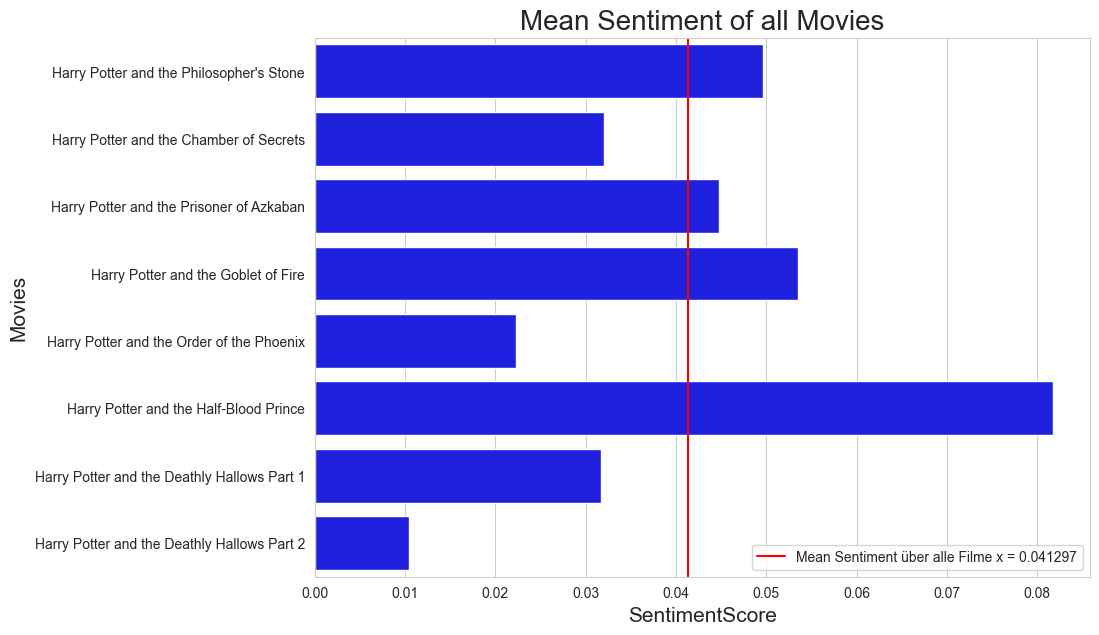

In [29]:
#Sedimentscore für jeden Film
#Sedimentscore über alles
score = df_movies['CompScore'].mean()
print(score)
#=0.04129742074153681
#wenn ich mittelwert über die Chapters mache, kommt ein schlechterer raus

#Sedimentscore üver jeden Film
sentiment_film = df_movies.groupby('Movie ID', as_index =False).CompScore.mean()
sentiment_film['Film'] = Movie['Movie Title']
sentiment_film = sentiment_film.loc[:,["Movie ID", "Film", "CompScore"]]
print(sentiment_film)

# for i in Movie['Movie ID']:
#     movie = df_movies[df_movies['Movie ID'] == i]
#     moviescore.append(movie.mean()['CompScore'])
# df_score = pd.DataFrame({'Film ID': Movie['Movie ID'] ,'Film': Movie['Movie Title'], 'Score': moviescore})
# print(df_score)

#Grafik
sns.set_style('whitegrid')
plt.figure(figsize= (10,7))
sns.barplot(x = 'CompScore' ,y ='Film', data = sentiment_film, color='blue')
plt.xlabel('SentimentScore', fontsize = 15)
plt.ylabel('Movies', fontsize = 15)
plt.title('Mean Sentiment of all Movies', fontsize = 20)
plt.axvline(x= score, color = 'red',label = "Mean Sentiment über alle Filme x = {}".format(round(score,6)))
plt.legend()
plt.show()


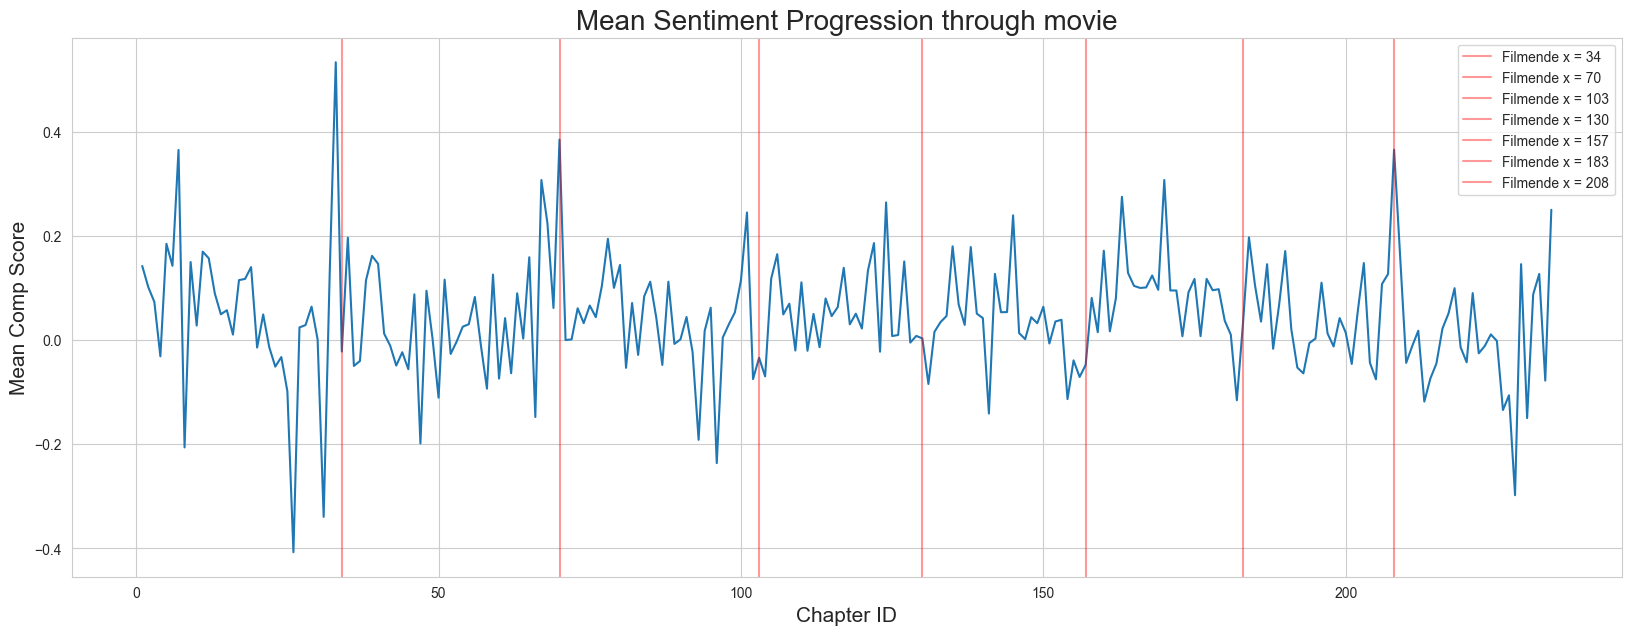

In [30]:
# Sentimentanalyse der Kapitel aber mit allen Charakteren
# scores = df_chardialogues.Dialogue.apply(lambda x: sediment.polarity_scores(x))
# scores
# df_chardialogues['SentimentScore'] = scores
# df_chardialogues['CompScore'] = df_chardialogues.SentimentScore.apply(lambda x: x.get('compound'))
# df_chardialogues['PosScore'] = df_chardialogues.SentimentScore.apply(lambda x: x.get('pos'))
# df_chardialogues['NegScore'] = df_chardialogues.SentimentScore.apply(lambda x: x.get('neg'))
# df_chardialogues['NeuScore'] = df_chardialogues.SentimentScore.apply(lambda x: x.get('neu'))
# df_chardialogues

#Sedimentscore über jedem Kapitel
sentimentchapter = pd.DataFrame(df_movies.groupby('Chapter ID', as_index = False).CompScore.mean())
sentimentchapter

# Grafik
sns.set_style('whitegrid')
plt.figure(figsize= (20,7))
sns.lineplot(x= 'Chapter ID' ,y ='CompScore', data = sentimentchapter)
plt.xlabel('Chapter ID', fontsize = 15)
plt.ylabel('Mean Comp Score', fontsize = 15)
plt.title('Mean Sentiment Progression through movie', fontsize = 20)
#Chaptergrenzen = [34,70,103,130,157,183,208]
for x in Filmgrenzen[:7]:
    plt.axvline(x=x, color = 'red', alpha = 0.4, label = "Filmende x = {}".format(x))
plt.legend()
plt.show()

# plt.rc("xtick", labelsize = 40)
# plt.rc("ytick", labelsize = 40)
# Chapter 1 nicht drinnen und sieht halt anders aus als in Kaggle Character Analysis

          CharacterName  CompScore
0         Alastor Moody   0.013300
1      Albus Dumbledore   0.132604
2        Arthur Weasley   0.118105
3   Bellatrix Lestrange   0.122644
4       Cornelius Fudge   0.078125
5                 Dobby   0.160000
6      Dolores Umbridge   0.067208
7          Draco Malfoy   0.042075
8          Fred Weasley   0.087596
9         Ginny Weasley   0.039844
10         Harry Potter   0.010529
11     Hermione Granger   0.018481
12      Horace Slughorn   0.208515
13        Lucius Malfoy   0.172372
14   Minerva McGonagall   0.141131
15        Molly Weasley   0.336208
16   Neville Longbottom   0.007163
17          Remus Lupin   0.206703
18          Ron Weasley  -0.020405
19        Rubeus Hagrid   0.044009
20        Severus Snape   0.116869
21         Sirius Black  -0.016956
22           Tom Riddle   0.035182
23       Vernon Dursley   0.039568
24            Voldemort   0.050879


C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\1363434771.py:41: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  sns.barplot(x= 'CompScore' ,y ='CharacterName', data = sentiment_characters, order = sentiment_characters.sort_values('CompScore', ascending =False).CharacterName[0:25], color='blue')


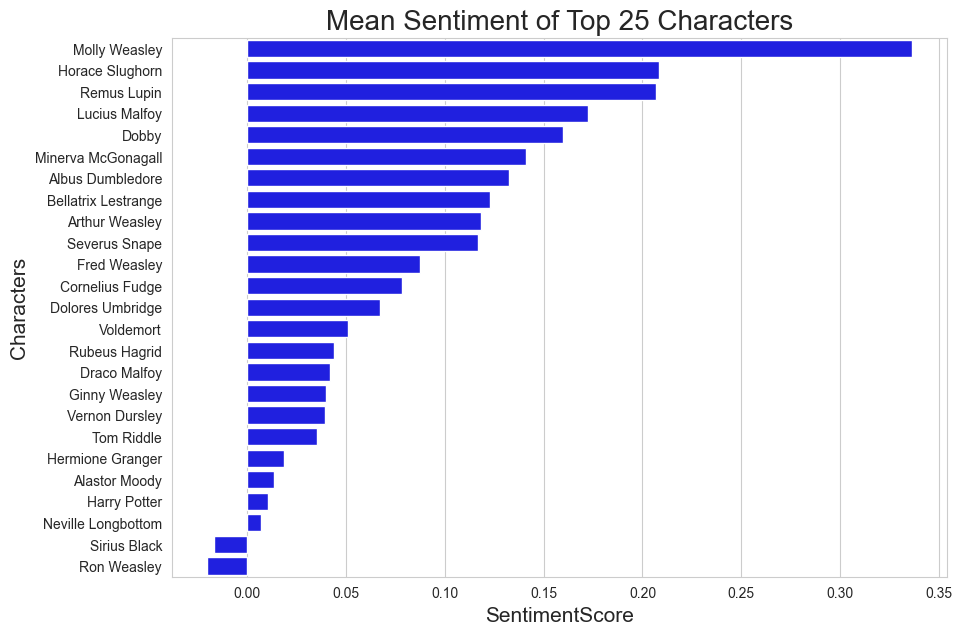

In [31]:
#Sentiment von allen Charakteren
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import matplotlib.pyplot as plt
# sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()

dialoge = df_movies['Tokens']
wordcount = []
for line in dialoge:
    wordcount.append(len(line))
wordcount
df_movies['wordcount'] = wordcount
df_movies
filtered = df_movies[df_movies['wordcount'] > 2]
counts = filtered['Character Name'].value_counts()
counts = counts[0:25]
counts = pd.DataFrame(counts)
counts['Count'] =counts['Character Name']
counts['Character Name']= counts.index
counts = counts.reset_index()
counts = counts.drop('index',axis =1)
counts

filtered = filtered[filtered['Character Name'].isin(counts['Character Name'])]
filtered
# scores = filtered.Dialogue.apply(lambda x: sediment.polarity_scores(x))
# scores
# filtered["SentimentScore"] = scores

# filtered["CompScore"] = filtered.SentimentScore.apply(lambda x: x.get("compound"))
# filtered["PosScore"] = filtered.SentimentScore.apply(lambda x: x.get("pos"))
# filtered["NegScore"] = filtered.SentimentScore.apply(lambda x: x.get("neg"))
# filtered["NeuScore"] = filtered.SentimentScore.apply(lambda x: x.get("neu"))
# filtered
sentiment_characters = filtered.groupby('Character Name', as_index =False).CompScore.mean()
sentiment_characters = sentiment_characters.rename(columns ={ sentiment_characters.columns[0]: 'CharacterName'})
print(sentiment_characters)

#Grafik
sns.set_style('whitegrid')
plt.figure(figsize= (10,7))
sns.barplot(x= 'CompScore' ,y ='CharacterName', data = sentiment_characters, order = sentiment_characters.sort_values('CompScore', ascending =False).CharacterName[0:25], color='blue')
plt.xlabel('SentimentScore', fontsize = 15)
plt.ylabel('Characters', fontsize = 15)
plt.title('Mean Sentiment of Top 25 Characters', fontsize = 20)
plt.show()

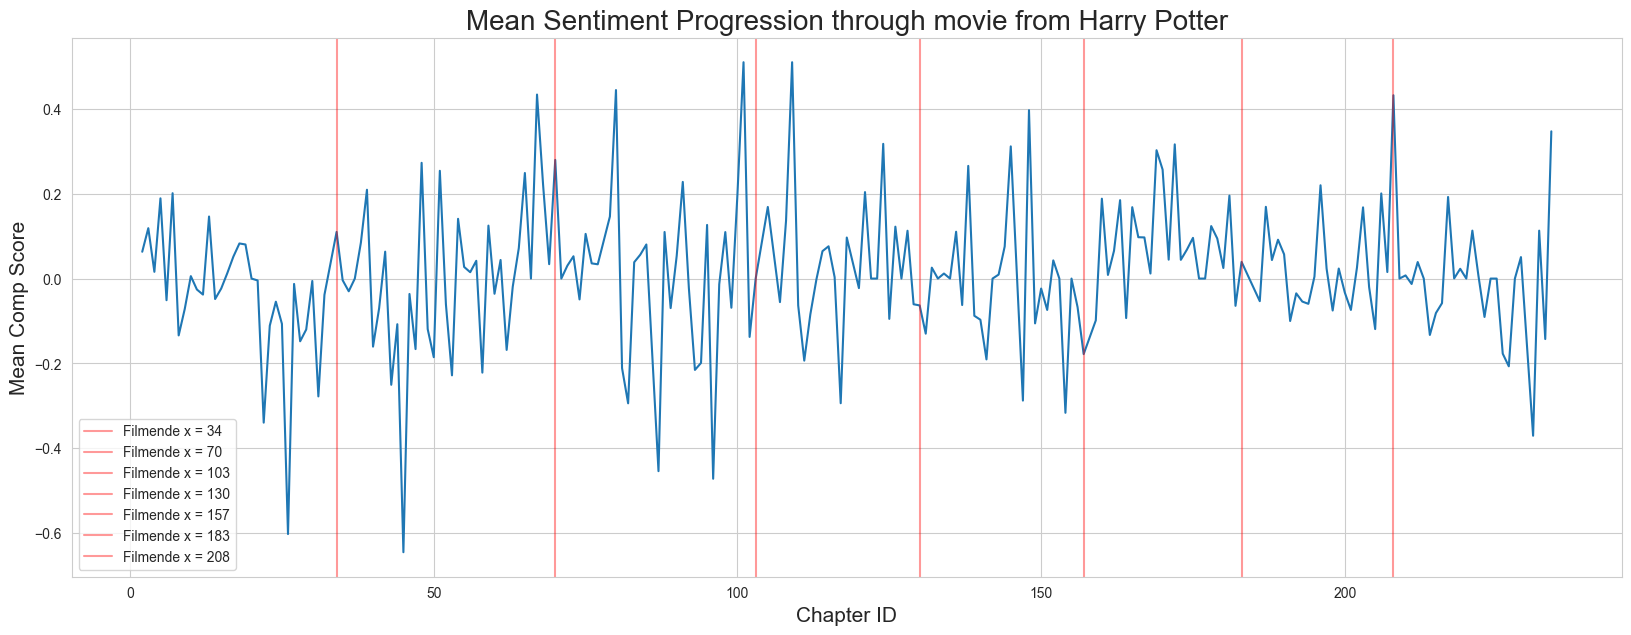

In [32]:
#SentimentAnalyse von Harry pro Chapter
# DialogHarry= df_dialogues[df_dialogues['Character ID']==1]
# DialogHarry
df_Harry =df_movies[df_movies['Character ID'] == 1]
df_Harry
# from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import matplotlib.pyplot as plt
# nltk.download("vader_lexicon")
# sediment = nltk.sentiment.vader.SentimentIntensityAnalyzer()

# scores = DialogHarry.Dialogue.apply(lambda x: sediment.polarity_scores(x))
# scores
# DialogHarry["SentimentScore"] = scores
# DialogHarry
# DialogHarry["CompScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("compound"))
# DialogHarry["PosScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("pos"))
# DialogHarry["NegScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neg"))
# DialogHarry["NeuScore"] = DialogHarry.SentimentScore.apply(lambda x: x.get("neu"))
# DialogHarry

# Chaptersentiment = df_Harry.groupby("Chapter ID").mean()["CompScore"]
# Chaptersentiment
sentiment_harry = df_Harry.groupby('Chapter ID', as_index =False).CompScore.mean()
sentiment_harry
sns.set_style('whitegrid')
plt.figure(figsize= (20,7))
sns.lineplot(x= 'Chapter ID' ,y ='CompScore', data = sentiment_harry)
plt.xlabel('Chapter ID', fontsize = 15)
plt.ylabel('Mean Comp Score', fontsize = 15)
plt.title('Mean Sentiment Progression through movie from Harry Potter', fontsize = 20)
#Chaptergrenzen = [34,70,103,130,157,183,208]
for x in Filmgrenzen[:7]:
    plt.axvline(x=x, color = 'red', alpha = 0.4, label = "Filmende x = {}".format(x))
plt.legend()
plt.show()

#### PROBLEM: CHAPTER 1 hat Harry nix gesprochen
#Chaptersentiment.plot(x= "Chapter ID", y = "CompScore", title="Sentimentpolarity von Harry")
#gesamte HarryScore über alle Kapitel
#score = Chaptersentiment.mean()
#score # = -0.035501721986438264
###vlt noch Polarität score Intervalle festlegen

C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\887785112.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i)
C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\887785112.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i)
C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\887785112.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i)
C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\887785112.py:27: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() 

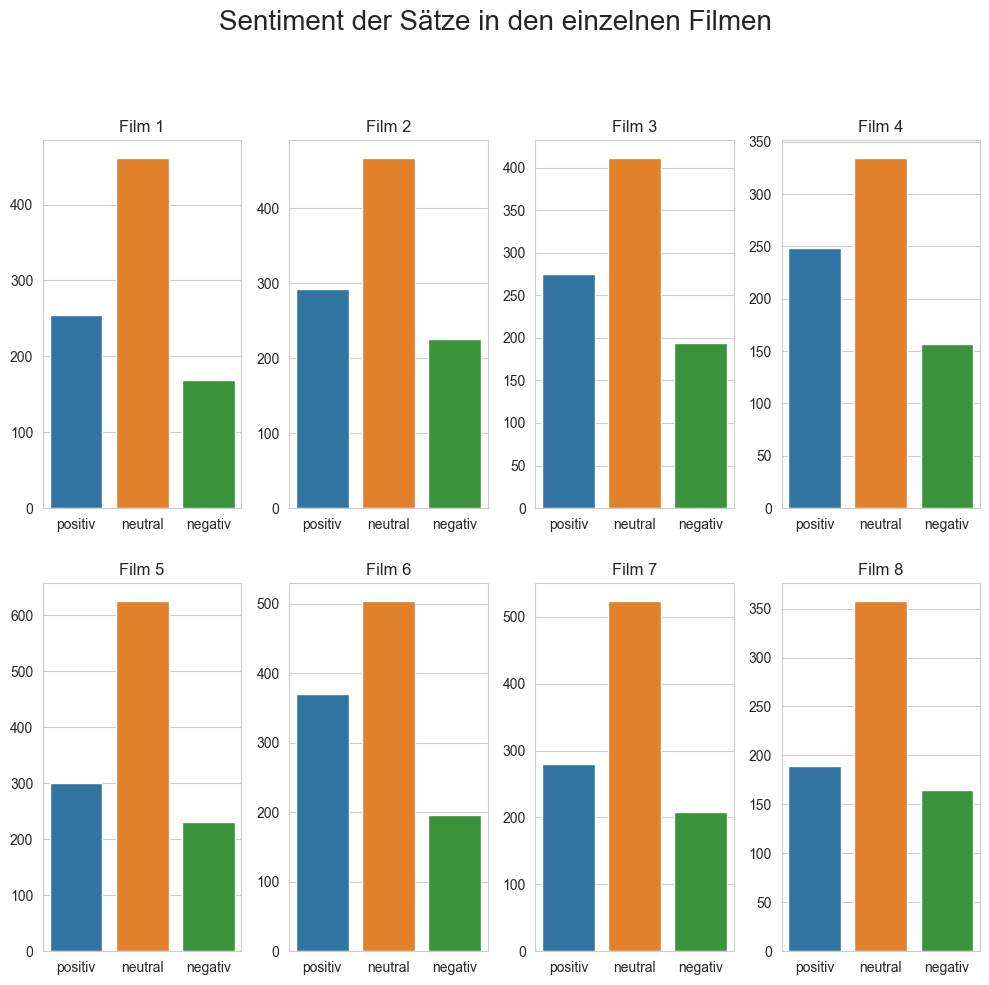

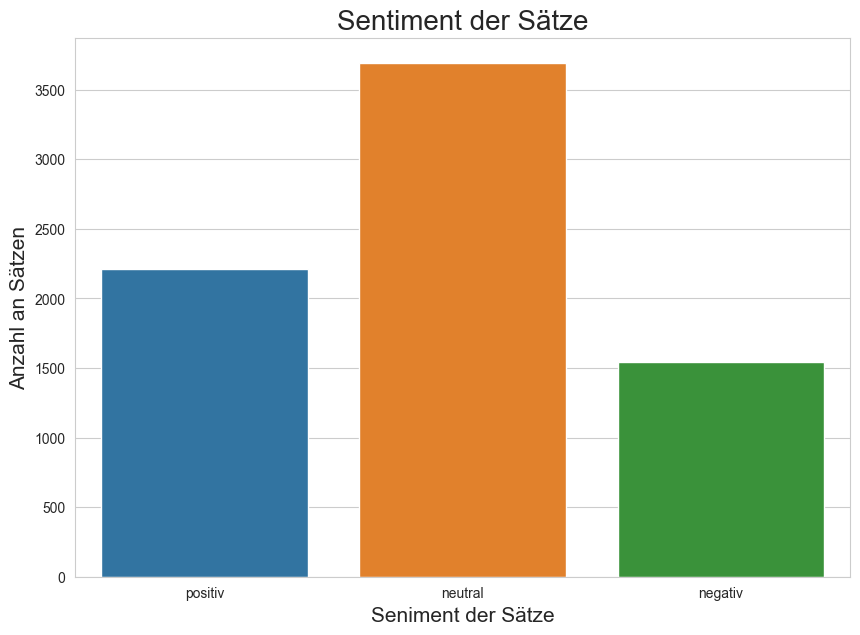

In [33]:
#Sentimentscore in Gruppen zusammenfügen
#sentimentflags dazufügen
#film1
df_movies['PosFlag'] = df_movies.CompScore.apply(lambda x: 1 if x >= 0.05 else 0)
df_movies['NegFlag'] = df_movies.CompScore.apply(lambda x: 1 if x <= -0.05 else 0)
df_movies['NeuFlag'] = df_movies.CompScore.apply(lambda x: 1 if x < 0.05 and x > -0.05 else 0) 
df_movies

#für jeden Film einzelnd
sns.set_style("whitegrid")
#plt.subplots_adjust(wspace = 0.9, hspace = 0.9)
#plt.figure(figsize= (100,100))
fig, ax = plt.subplots(4,2)
fig.set_figheight(10)
fig.set_figwidth(10)
# plt.figures(fig, figsize =(10,7))

for i in Movie['Movie ID']:
    movie = df_movies[df_movies['Movie ID'] == i]

    AnzahlposSätze = movie['PosFlag'].sum()
    AnzahlnegSätze = movie['NegFlag'].sum()
    AnzahlneuSätze = movie['NeuFlag'].sum()

    y = [AnzahlposSätze,AnzahlneuSätze,AnzahlnegSätze]
    x = ['positiv','neutral', 'negativ']
    plt.subplot(2,4,i)
    #plt.title(str(Movie["Movie Title"]))
    plt.title('Film '+ str(i))
    sns.barplot(x= x ,y = y )

# plt.figures("Film", figsize =(10,7))
fig.tight_layout(h_pad = 3)
#plt.figure(figsize= (100,100))
#  plt.title("Sentiment der Sätze in den einzelnen Filmen", fontsize = 20)
# plt.xlabel("Seniment der Sätze", fontsize = 15)
# plt.ylabel("Anzahl an Sätzen", fontsize = 15)
plt.suptitle('Sentiment der Sätze in den einzelnen Filmen', fontsize = 20)
plt.subplots_adjust(top = 0.85)
plt.show()

#insgesamt über alle Filme
AnzahlposSätze = df_movies['PosFlag'].sum()
AnzahlnegSätze = df_movies['NegFlag'].sum()
AnzahlneuSätze = df_movies['NeuFlag'].sum()

y = [AnzahlposSätze,AnzahlneuSätze,AnzahlnegSätze]
x = ['positiv','neutral', 'negativ']

sns.set_style('whitegrid')
plt.figure(figsize= (10,7))
sns.barplot(x= x ,y = y )
plt.xlabel('Seniment der Sätze', fontsize = 15)
plt.ylabel('Anzahl an Sätzen', fontsize = 15)
plt.title('Sentiment der Sätze', fontsize = 20)
plt.show()

C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\3545255618.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i)
C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\3545255618.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i)
C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\3545255618.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,4,i)
C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\3545255618.py:22: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remov

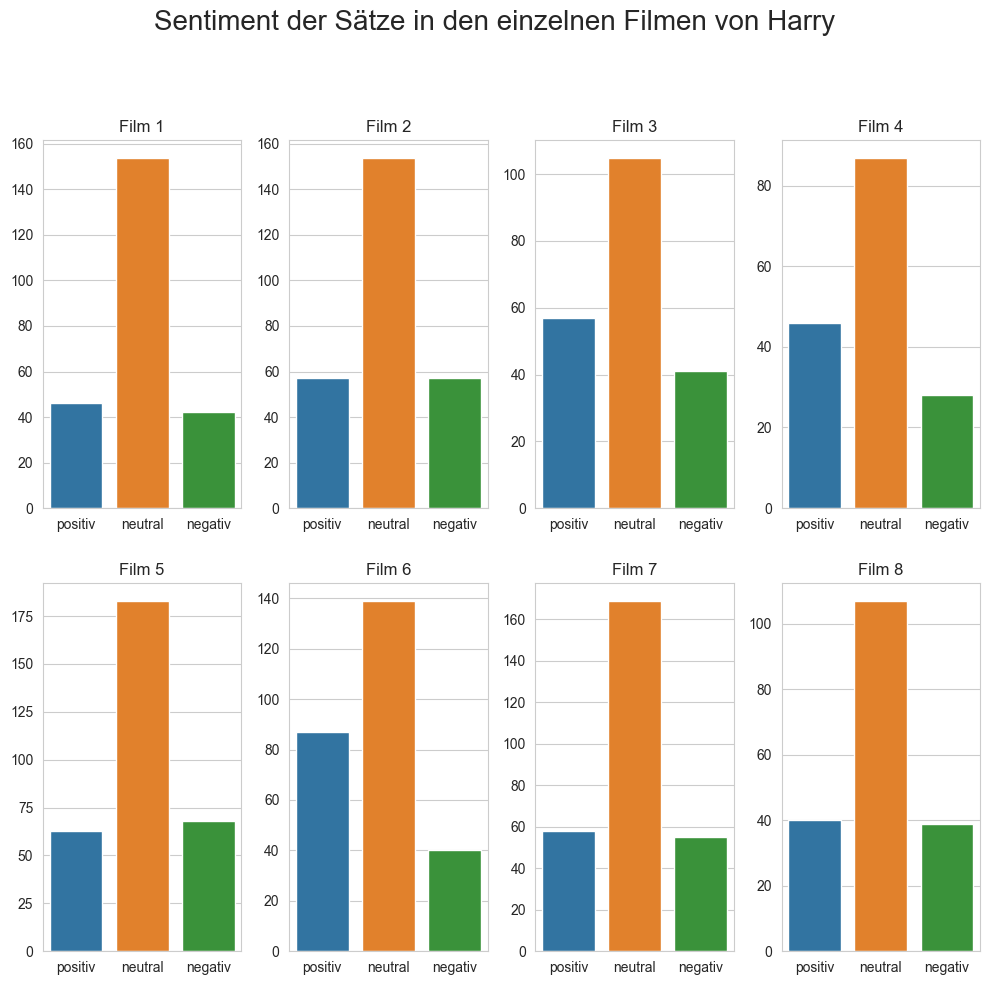

In [34]:
#Plots für Harry Stimmung
df_Harry =df_movies[df_movies['Character ID'] == 1]
df_Harry
sns.set_style("whitegrid")
#plt.subplots_adjust(wspace = 0.9, hspace = 0.9)
#plt.figure(figsize= (100,100))
fig, ax = plt.subplots(4,2)
fig.set_figheight(10)
fig.set_figwidth(10)
# plt.figures(fig, figsize =(10,7))


for i in Movie['Movie ID']:
    movie = df_Harry[df_Harry['Movie ID'] == i]

    AnzahlposSätze = movie['PosFlag'].sum()
    AnzahlnegSätze = movie['NegFlag'].sum()
    AnzahlneuSätze = movie['NeuFlag'].sum()

    y = [AnzahlposSätze,AnzahlneuSätze,AnzahlnegSätze]
    x = ['positiv','neutral', 'negativ']
    plt.subplot(2,4,i)
    #plt.title(str(Movie["Movie Title"]))
    plt.title('Film '+ str(i))
    sns.barplot(x= x ,y = y )

# plt.figures("Film", figsize =(10,7))
fig.tight_layout(h_pad = 3)
#plt.figure(figsize= (100,100))
#  plt.title("Sentiment der Sätze in den einzelnen Filmen", fontsize = 20)
# plt.xlabel("Seniment der Sätze", fontsize = 15)
# plt.ylabel("Anzahl an Sätzen", fontsize = 15)
plt.suptitle('Sentiment der Sätze in den einzelnen Filmen von Harry', fontsize = 20)
plt.subplots_adjust(top = 0.85)
plt.show()

In [35]:
from nrclex import NRCLex
NRCLex.lexicon

{'abacus': ['trust'],
 'abandon': ['fear', 'negative', 'sadness'],
 'abandoned': ['anger', 'fear', 'negative', 'sadness'],
 'abandonment': ['anger', 'fear', 'negative', 'sadness', 'surprise'],
 'abba': ['positive'],
 'abbot': ['trust'],
 'abduction': ['fear', 'negative', 'sadness', 'surprise'],
 'aberrant': ['negative'],
 'aberration': ['disgust', 'negative'],
 'abhor': ['anger', 'disgust', 'fear', 'negative'],
 'abhorrent': ['anger', 'disgust', 'fear', 'negative'],
 'ability': ['positive'],
 'abject': ['disgust', 'negative'],
 'abnormal': ['disgust', 'negative'],
 'abolish': ['anger', 'negative'],
 'abolition': ['negative'],
 'abominable': ['disgust', 'fear', 'negative'],
 'abomination': ['anger', 'disgust', 'fear', 'negative'],
 'abort': ['negative'],
 'abortion': ['disgust', 'fear', 'negative', 'sadness'],
 'abortive': ['negative', 'sadness'],
 'abovementioned': ['positive'],
 'abrasion': ['negative'],
 'abrogate': ['negative'],
 'abrupt': ['surprise'],
 'abscess': ['negative', 'sad

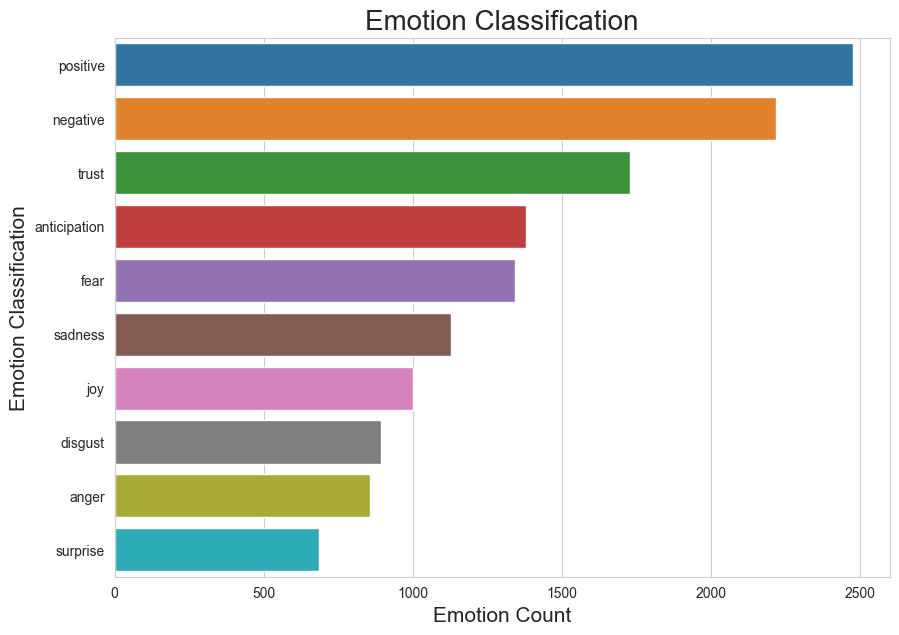

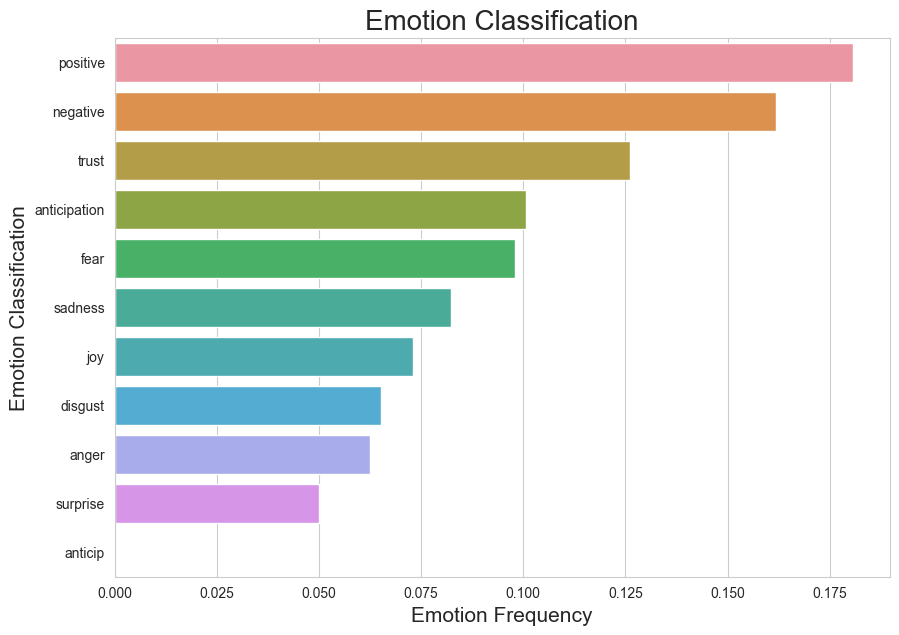

In [36]:

str_dialoge = ",".join(df_chardialogues["Dialogue"])
str_dialoge
dialoge_object = NRCLex(str_dialoge)
dialoge_object


#pro Satz
data = dialoge_object.raw_emotion_scores
data

emotion_df = pd.DataFrame.from_dict(data,orient = "index")
emotion_df= emotion_df.reset_index()
emotion_df = emotion_df.rename(columns={"index": "Emotion Classification", 0: "Emotion Count"})
emotion_df = emotion_df.sort_values(by = ["Emotion Count"], ascending =False)
emotion_df

sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x="Emotion Count" ,y = "Emotion Classification", data = emotion_df)
plt.xlabel("Emotion Count", fontsize = 15)
plt.ylabel("Emotion Classification", fontsize = 15)
plt.title("Emotion Classification", fontsize = 20)
plt.show()

#jedes Wort anschauen
dialoge_object.affect_dict
affect_df = pd.DataFrame.from_dict(dialoge_object.affect_dict, orient ="index")
affect_df

data1 = dialoge_object.affect_frequencies
frequencieemotion_df = pd.DataFrame.from_dict(data1,orient = "index")
frequencieemotion_df= frequencieemotion_df.reset_index()
frequencieemotion_df = frequencieemotion_df.rename(columns={"index": "Emotion Classification", 0: "Emotionfrequency"})
frequencieemotion_df = frequencieemotion_df.sort_values(by = ["Emotionfrequency"], ascending =False)
frequencieemotion_df
sns.set_style("whitegrid")
plt.figure(figsize= (10,7))
sns.barplot(x="Emotionfrequency" ,y = "Emotion Classification", data = frequencieemotion_df)
plt.xlabel("Emotion Frequency", fontsize = 15)
plt.ylabel("Emotion Classification", fontsize = 15)
plt.title("Emotion Classification", fontsize = 20)
plt.show()

C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\2766173366.py:37: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  personen = totalword.sort_values('wordcount',ascending = False).CharacterName[0:10]


                                      paar  score
0         (harry potter, hermione granger)     73
2              (harry potter, ron weasley)     67
3            (harry potter, rubeus hagrid)     55
10         (hermione granger, ron weasley)     46
1         (harry potter, albus dumbledore)     44
8                (harry potter, voldemort)     37
9     (hermione granger, albus dumbledore)     26
23           (albus dumbledore, voldemort)     25
19       (albus dumbledore, severus snape)     25
4            (harry potter, severus snape)     19
11       (hermione granger, rubeus hagrid)     16
20     (albus dumbledore, horace slughorn)     16
18       (albus dumbledore, rubeus hagrid)     15
24            (ron weasley, rubeus hagrid)      8
12       (hermione granger, severus snape)      7
16           (hermione granger, voldemort)      7
25            (ron weasley, severus snape)      6
21  (albus dumbledore, minerva mcgonagall)      6
44                (remus lupin, voldemort)      6


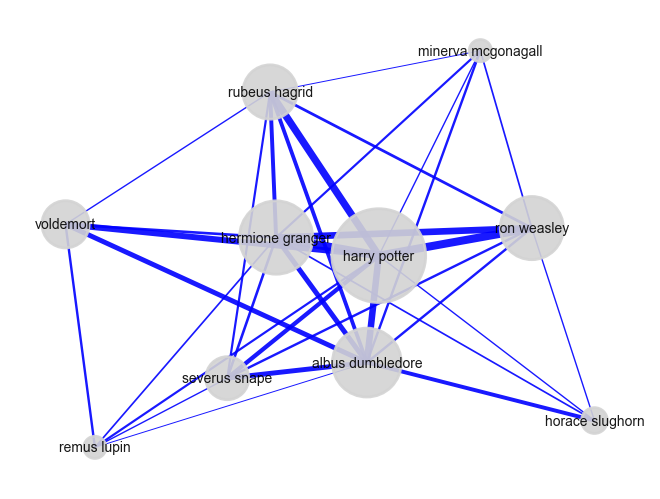

In [37]:
#Netzwerk Beziehungen der 10 Menschen, die ammeisten reden
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
charaktere = df_characters['Character Name'].str.lower().to_list()
charaktere

# Check whether a row (i.e., a dialogue) contains a person, and returns the person as item of a list in the row. Function had to be modified to recognize BOTH one- and two-word spells.
def count_person_1and2words(row, charakter):
    used_char = []
    for char in charakter:
        if ' ' in char:
            # Check if the two-word spell appears as a whole
            if char in ' '.join(row):
                used_char.append(char)
            else:
                s = char.split()
                if s[0] in row or s[1] in row:
                    used_char.append(char)
        else:
            # Check if the one-word person appears as a whole or as part of a larger word
            if char in row:
                used_char.append(char)
   
    return used_char

# Use count_person_1and2words and apply it into the column 'chara' for each row
df_movies['chara'] = df_movies['Tokens'].apply(count_person_1and2words, charakter = charaktere)
df_movies

#alle Character Namen in der Spalte klein schreiben
df_movies['Character Name'] = df_movies["Character Name"].str.lower()
df_movies

#die 10 Personen,die am meisten Wörter reden rausfinden
totalword['CharacterName'] = totalword['CharacterName'].str.lower()
personen = totalword.sort_values('wordcount',ascending = False).CharacterName[0:10]
personen

#zählt in jeder Zeile die Tupel der Spalten Character Name und chara
def count_tupel(row, paar):
    zw_summe = 0
    if row['Character Name'] == paar[0]:
        if paar[1] in row['chara']:
                zw_summe += 1
    return zw_summe


score = []

#für jedes Tupel wird die Häufigkeit mithilfe der Funktion count_tupel gezählt und in score gespeichert
for paar in combinations(personen,2):
    zw_summe = 0
    score.append(sum(df_movies.apply(count_tupel, args = (paar,), axis = 1)))

score

#Speichern der Ergebnisse
Tupelchar = pd.DataFrame({'paar': combinations(personen,2), 'score': score})
print(Tupelchar.sort_values('score', ascending = False))


#Graph 
G = nx.Graph()
edges = list(Tupelchar[Tupelchar.score > 0].paar) #Kanten
weights = list(Tupelchar[Tupelchar.score > 0].score) #Gewichte

G.add_edges_from(edges)


#je mehr Beziehungen eine Person hat, desto größer soll ihre Node sein; wir summieren für jede Person ihre Beziehungsnummer zusammen
summe = []
for node in list(G):
    zw_summe = 0
    for (edge, weight) in zip(edges, weights):
        if node in edge:
            zw_summe += weight
    summe.append(zw_summe*15)

#width: für jede Beziehung: je mehr Sätze zwischen einander gewechselt wurden, desto stärker ist die Beziehung und desto stärker soll der strich sein
nx.draw(G,
 with_labels = True, edge_color ='blue', width = [(weight/2)**0.5 for weight in weights], node_size = summe, linewidths = 2,
 node_color = 'lightgray', node_shape = 'o', 
 font_size = 10, font_color ='black',
  alpha = 0.9)

plt.show()

In [38]:
df_chardialogues
len(list(combinations(charaktere,2)))
totalword["CharacterName"] = totalword["CharacterName"].str.lower()
hallo = totalword.sort_values("wordcount",ascending = False).CharacterName[0:10]
hallo

C:\Users\ACG\AppData\Local\Temp\ipykernel_21936\1140959657.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  hallo = totalword.sort_values("wordcount",ascending = False).CharacterName[0:10]


66           harry potter
68       hermione granger
2        albus dumbledore
129           ron weasley
131         rubeus hagrid
136         severus snape
69        horace slughorn
93     minerva mcgonagall
126           remus lupin
156             voldemort
Name: CharacterName, dtype: object

In [39]:
char_dial_documents_train = []
char_dial_documents_test = []
for df in df_characters_list:
    for _, row in df.iterrows():
        character_id = row['Character ID']
        data = df['Tokens'].tolist()
        char_dial_documents_train.append(TaggedDocument(data, [character_id]))
        char_dial_documents_test.append(data)

In [40]:
film_dial_documents = []
for df in film_dial_list:
    for _, row in df.iterrows():
        movie_id = row['Movie ID']
        data = df['tokens'].tolist()
        film_dial_documents.append(TaggedDocument(data, [movie_id]))

KeyError: 'tokens'